# <font color='maroon'>What is Correlation?</font>

This notebook touches on:
* Correlation
* Quick Visualizations
* Unusual Values

In this lesson, we learn how to measure correlations between quantities. For example, in an economy, as inflation goes up, the price of oil also goes up. This is an example of a linear relationship that can be quantified by calculating the correlation coefficient between inflation and oil.  

<p></p>
In this notebook, we'll look at how to calculate the Pearson correlation coefficient, which measures the strength of a linear relationship between two continuous variables. We will be using a dataset on Weight and Metabolic rates of 44 women to help us learn how to apply this measure. 

<p></p>
In Python, the Scipy library provides a function called `pearsonr()` to calculate  the strength of a linear relationship.
We start to use the [Scipy](https://scipy.org/scipylib/index.html) statistics library for our analysis. Scipy is a powerful statistics library that works with Numpy, Matplotlib, and Pandas. So you can easily use functions for statistical analysis on dataframes or Numpy arrays. There are other statistics Python modules like Statsmodels and Scikits. Statsmodels has the same functions as and uses Scipy.stats; and Scikits is optimized for machine learning. Statsmodels also works with Pandas dataframes.
<p></p>
No one library is perfect, you might need to put together different libraries to do what you want. We choose Scipy as a starting step. We use scipy.stats because it provides user-friendly functions for statistical tests. 

## How do we measure correlation?

A measure of correlation determines how one variable increases or decreases as another increases or decreases. We'll use a widely used measure called the Pearson correlation measure to determine the strength of a linear relationship between two quantities or continuous variables. Suppose we want to know if there is a relationship between the weight (in kilograms) and metabolic rates (calories/day) of 44 women. How do you use the Pearson correlation measure to quantify this relationship?

The Pearson measure returns a coefficient $r$ that lies between -1 and +1. To determine the strength of a linear relationship between variables $x$ and $y$, we use the following formula:

$$r_{x,y} = \dfrac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum(x_i - \overline{x})^2\sum(y_i - \overline{y})^2}},$$ where $x_i$ is a single observation, $\overline{x}$ the mean of the set of $x$ data points, $y_i$ is a single observation, and $\overline{y}$ the mean of the set of $y$ data points. The formula subtracts observations from their means and rescales them by a measure of their standard deviations. By rescaling, the result falls in the range $$-1 \leq r \leq 1.$$

<img src='images/blog-introduction-to-correlation-learn-data-science-tutorials-img-1.png'/>
Image courtesy of [Introduction to correlation](https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials).


A correlation coefficient close to<b> +1</b> indicates a <b>strong positive relationship</b>.

A correlation coefficeint close to<b> -1</b> indicates a<b> strong negative relationship</b>.

A correlation coefficient equal to <b>zero</b> indicates <b>no relationship exists between the variables</b>.

There are other correlation measures, like Spearman rank correlation calculates a measure based on ranked data. Spearman rank correlation is also not restricted to linear relationships between variables. We will focus on Spearman rank correlation in later sections.

### The dataset

First, let's begin by importing the necessary libraries for finding correlations.

In [1]:
import numpy as np              # import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats      # import scipy.stats and rename it

In [2]:
%matplotlib inline

Let's load the dataset into a Pandas frame and explore it.

In [3]:
data = pd.read_csv('weight-and-metabolic.csv', sep=',')
data

,Body weight,Metabolic rate
0,49.9,1079
1,50.8,1146
2,51.8,1115
3,52.6,1161
4,57.6,1325
5,61.4,1351
6,62.3,1402
7,64.9,1365
8,43.1,870
9,48.1,1372


Let's study the data:

In [4]:
data.shape

(44, 2)

There are indeed 44 observations, with two features.

In [5]:
data.columns

Index(['Body weight', 'Metabolic rate'], dtype='object')

In [6]:
data.head()

,Body weight,Metabolic rate
0,49.9,1079
1,50.8,1146
2,51.8,1115
3,52.6,1161
4,57.6,1325


And generate summary statistics.

In [7]:
data.describe()

,Body weight,Metabolic rate
count,44.000000,44.000000
mean,74.879545,1339.840909
std,24.632136,233.650100
min,43.100000,870.000000
25%,57.200000,1159.500000
50%,64.900000,1333.500000
75%,88.775000,1467.750000
max,143.300000,2074.000000


## Quick visualizations

Now that we understand a bit more about the data, let's proceed to visualizations.

A scatterplot is a great way to visualize a relationship between the continous variables of interest. Let's use a Seaborn function to create a scatterplot. Remember, Seaborn is great for statistically-minded plots which would otherwise require more coding with Matplotlib.

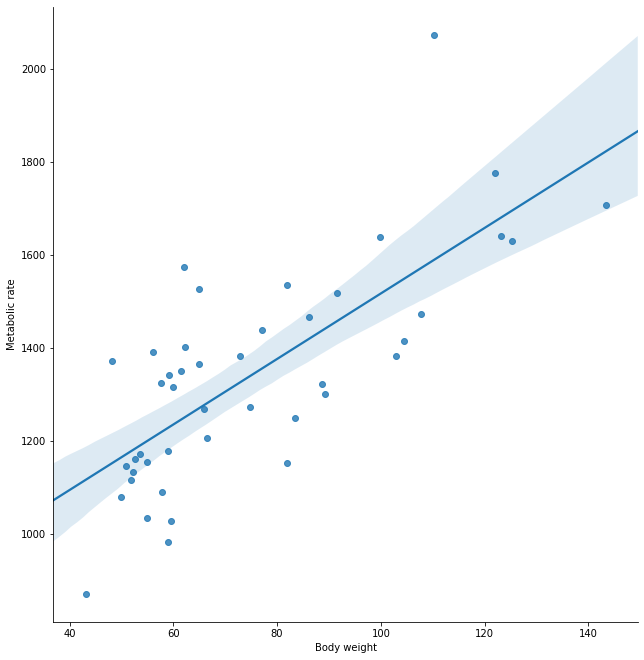

In [8]:
g = sns.lmplot('Body weight',   # x-axis
               'Metabolic rate',# y-axis
               data=data,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(10,10)    # set the size of the figure

The function `lmplot()` stands for linear model plot. It produces a scatterplot and fits a regression model. 

The regression line is optimal, as it minimizes the distance of all points to itself. Because of this property, the slope of the regression line of Y and X is mathematically equivalent to correlation between X and Y, standardized by the ratio of their standard deviations:

$$\rho = b\frac{s_x}{s_y}$$

where b is the slope of the regression line of Y from X.

In other words, correlation reflects the association and amount of variability between the two variables.

This relationship with the slope of the line has two important implications:

    1) It makes it more clear why Pearson correlation describes linear relationships
    2) It also shows why correlation is important and so widely used in predictive modeling


### Line of best fit

The line of best fit is a straight line drawn through a set of datapoints in a scatterplot to give the best approximation of the data. We won't go into how this line is generated (e.g. least squares method). However, the Pearson correlation coefficient is a measure of how far away the datapoints for two variables are from this line.

A correlation coefficient of +1 or -1 does not only represents positive or negative correlation respectively. These values indicate that all the datapoints for the two variables follow this line of best fit. As r -> 0, the variation of the data points around the line of best fit increases and is interpreted as a reduced/no linear relationship between the variables.

With Scipy.stats, we can calculate r as follows:

In [9]:
# r- Pearson correlation coefficient
# p - probability of observing a correlation that extreme in the dataset
r, p = stats.pearsonr(data['Body weight'], data['Metabolic rate'])
print(r)
print(p)

0.7442378582125734
7.025380405007154e-09


The Body weight and Metabolic rate for the 44 women are highly positively correlated. Assuming an alpha level of 5%, the p-value we see above indicates that indeed there is a relationship between the two variables: Body Weight and Metabolic rate. (Null hypothesis is that there is no relationship between the two - without regard to the strength of the relationship.

## Unusual values

Apart from showing the association between two variables, scatterplots can indicate whether there are outliers or influential values that could affect the strength of the relationship between variables in a dataset. Look back at the figure we quickly generated above. Do you notice any outliers? If you look closely, you will notice that one of the points exceeds a metabolic rate of 2000. The same thing can be confirmed using other visual tools like we looked at before such as histograms and boxplots.

### Identifying outliers with boxplots and histograms

To identify outliers, we can use a box plot. We see two outliers for both the `Body weight` and `Metabolic rate`. 

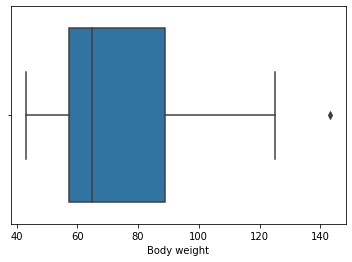

In [10]:
#plot a boxplot of the Body weight
sns.boxplot(data['Body weight'], orient='h')

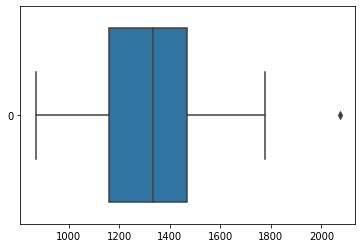

In [11]:
#plot a boxplot of the Metabolic rate
sns.boxplot(data=data['Metabolic rate'], orient='h')

For both variables, we see an outlier to the right of the box, beyond the upper limit whisker of the plot. This indicates that the data is skewed to the right and the mean is higher than the median. Take a look at how the data looks when plotted on a histogram. 

<b>Pracitce Challenge</b>: Produce histograms for the `Body weight` and `Metabolic rate` columns. 

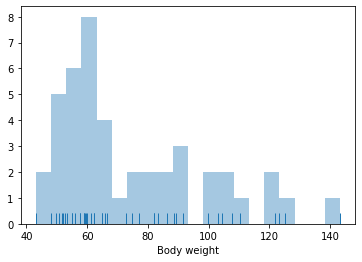

In [12]:
# your answer
#first find the right function in Seaborn to plot histograms then
#plot histogram for Birthweight
sns.distplot(data['Body weight'], bins=20, kde=False, rug=True);

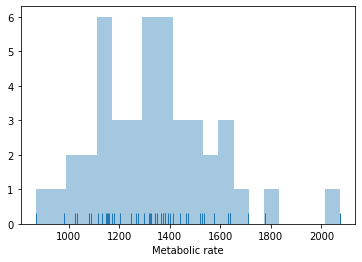

In [13]:
#plot histogram for Metabolic Rate
sns.distplot(data['Metabolic rate'], bins=20, kde=False, rug=True);

How does the shape of your histograms compare to the boxplots and the scatterplot, especially with regard to the presence of outliers? Enter your discussion in the cell below.

My histograms are compatible with the boxplots. Its show outliers at the 140 point for the Body weight and above 
the point 2000 for the Metabolic rate. And as far as the scatterplot concerns. It is compatible with boxplots and 
histograms for the metabolic rate. It shows an outlier above the point 2000. And it shows an isolate point for body 
weigth above the point 140.

<b>#Discuss shape of histograms here#</b>

So, why do we look into outliers? It turns out that Pearson correlation testing is sensitive to outliers. If an outlier has high influence on the correlation analysis, it could result in a false correlation coefficient, slope of the regression line, predicted results or hypothesis test results, if any. It's important to verify whether these unusual datapoints make a difference for your analysis and application of the results.

<b> Outliers</b> are points that don't fit the general trend of the regression line and are normally extreme in the y-direction.
<b> Leverage points </b> are another type of unusual observation and are usually extreme in the x-direction. In the scatterplot, we saw an outlier exceeding metabolic rate 2000. In the exercise below, you will evaluate whether this outlier affects the correlation results we previously found.

## Exercise

Determine whether the observed data point influences your correlation results. Locate and remove the datapoint, re-plot the histogram and recalculate the correlation coefficient to see if there is a difference.

Step 1: Locate and remove the unusual datapoint.

In [19]:
data = data[data['Body weight'] <= 140]
data = data[data['Metabolic rate'] <= 2000]
data

,Body weight,Metabolic rate
0,49.9,1079
1,50.8,1146
2,51.8,1115
3,52.6,1161
4,57.6,1325
5,61.4,1351
6,62.3,1402
7,64.9,1365
8,43.1,870
9,48.1,1372


In [26]:
#your answer
#Remove the outliers from the height column
for i in range(data.shape[0]) :
    if data.loc([i], ['Body weight']) >= 140:
        data = data.drop(axis=i, columns =['Body weight', 'Metabolic rate'])
#data = data[(data['Body weight'] < q_hi) & (data['Body weight'] > q_low)]
#data = data[(data['Metabolic rate'] < q_hi1) & (data['Metabolic rate'] > q_low1)]
data.head() # Check the current data to confirm the outlier is removed 

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

Step 2: Re-plot the scatterplot to ensure no more outliers

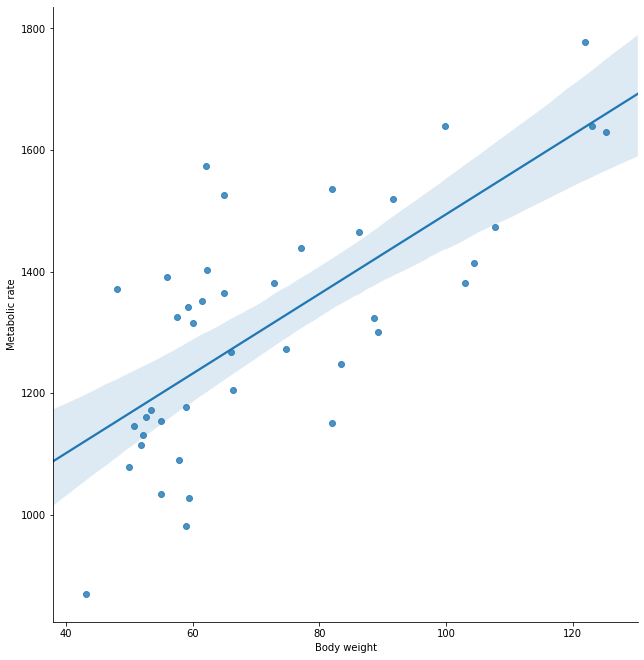

In [20]:
g = sns.lmplot('Body weight',   # x-axis
               'Metabolic rate',# y-axis
               data=data,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(10,10) 

Step 3: Recalculate the correlation coefficient and compare your results to the previous output when the outlier was included.

In [21]:
#your answer
r, p = stats.pearsonr(data['Body weight'], data['Metabolic rate'])
print(r)
print(p)

0.7205172201309727
7.442372986772173e-08


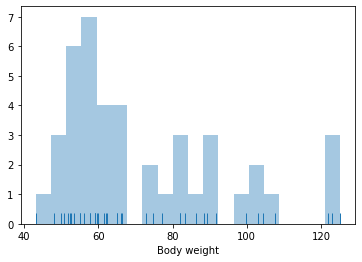

In [22]:
sns.distplot(data['Body weight'], bins=20, kde=False, rug=True);

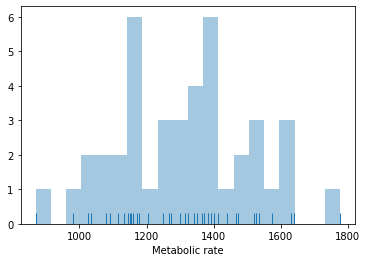

In [23]:
sns.distplot(data['Metabolic rate'], bins=20, kde=False, rug=True);

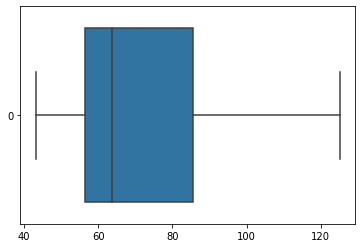

In [25]:
#plot a boxplot of the Metabolic rate
sns.boxplot(data=data['Body weight'], orient='h')

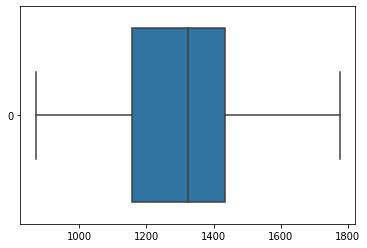

In [24]:
#plot a boxplot of the Metabolic rate
sns.boxplot(data=data['Metabolic rate'], orient='h')

The correlation coefficient r = 0.7467932752731479 is slightly bigger than the correlation coefficient 
r = 0.7442378582125734 with the outlier. But with the slope of the regression line of Y and X, p = 8.896248382595844e-09, we have noticed there is a real difference with the slope of the regression line of Y and X
p = 7.025380405007154e-09.

## References

For another explanation on correlation see [Introduction to Correlation](https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials).

For more on unusual values: outliers and leverage points see [Unusual Observations](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/model-assumptions/unusual-observations/).
